### QUEST
- 분석 스토리 작성(목표변수: 생존여부)
- dataset : TitanicFromDisaster_train.csv
- DDA, EDA 진행
- 설명변수는 연속형,범주형 섞어서 7개 이상

In [146]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [147]:
df_TFD = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TFD

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [148]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
df_TFD.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [150]:
# 1. 목표변수, 설명변수 설정
# - 목표변수 : 생존여부
# - 설명변수 : 'Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'
df_TFD_sur = df_TFD[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
df_TFD_sur

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [151]:
# 2. 전처리
## 결측치 확인 후 제거
df_TFD_sur = df_TFD_sur.dropna()
df_TFD_sur.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 상관관계 확인
- 목표변수 : '생존여부'
    (연속형-정규화 확인, 범주형-밸런스 확인)
- 설명변수 :
    - 'Pclass' : 등급이 높을수록 생존율이 높아보임
    - 'Sex' : 남성보다 여성이 생존율이 높아보임
    - 'SibSp' : 생존여부 차이 여부 확인 필요->확증 데이터 분석
    - 'Parch' : 부모/자녀 함께 탑승한 사람의 생존율이 높아보임
    - 'Fare' : 운임이 높을수록 생존율이 높아보임
    - 'Embarked': S/C/Q 승선항에 따라서 생존율에 차이가 보임
- 분석 스토리
    - 객실등급(1 > 2 > 3), 승선항(Cherbourg > Queenstown > Southampton), 탑승 요금에 따라 생존율이 달라짐을 알 수 있다. 해당 데이터들은 생존률 판단에 도움이 되는 것으로 판단됨
    - 남성보다 여성의 생존율이 높다(female > male) -> 여성과 어린이를 먼저 탈출시켰던 것으로 예측해볼 수 있음.
    - 동승객이 있을 경우 생존율이 높게 나타나는 것으로 보이지만 정확한 관계 여부는 수치로 확인이 더 필요함

<Axes: xlabel='Survived', ylabel='count'>

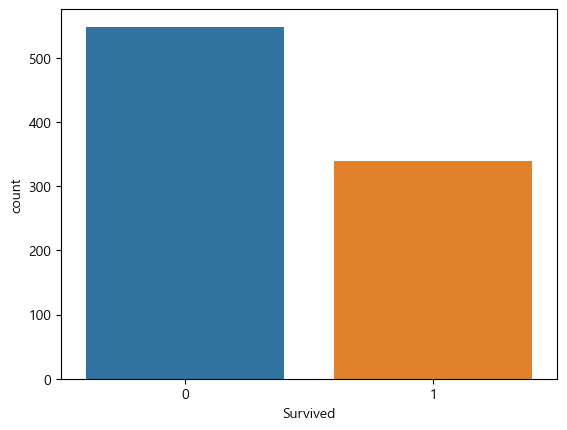

In [152]:
# 데이터 타입과 분포
sns.countplot(data=df_TFD_sur, x='Survived')

In [153]:
## object로 변환 : 'Survived','Pclass'
df_TFD_sur[['Survived','Pclass']] = df_TFD_sur[['Survived','Pclass']].astype(object)
df_TFD_sur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    object 
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 55.6+ KB


C:\Users\koreavc\AppData\Local\Temp\ipykernel_6432\3000637721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TFD_sur[['Survived','Pclass']] = df_TFD_sur[['Survived','Pclass']].astype(object)


In [186]:
# 이상치 확인(단일변수) : SibSp, Parch, Fare
sur_list = df_TFD_sur.describe().columns.to_list()
sur_list

['SibSp', 'Parch', 'Fare']

In [155]:
df_TFD_sur['SibSp'].describe()

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [156]:
## 1. SibSp
Q1 = df_TFD_sur['SibSp'].describe()['25%']
Q3 = df_TFD_sur['SibSp'].describe()['75%']
IQR = Q3-Q1

In [157]:
Q1, Q3, IQR

(0.0, 1.0, 1.0)

In [158]:
bound_up = Q3 + 1.5 * IQR
bound_up

2.5

In [159]:
condition = (df_TFD_sur['SibSp'] <= bound_up)
df_TFD_sur_condition = df_TFD_sur[condition]

In [173]:
df_TFD_sur['Parch'].describe()

count    889.000000
mean       0.382452
std        0.806761
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [170]:
## 2. Parch
Q1 = df_TFD_sur['Parch'].describe()['25%']
Q3 = df_TFD_sur['Parch'].describe()['75%']
IQR = Q3-Q1

In [161]:
Q1, Q3, IQR

(0.0, 0.0, 0.0)

In [162]:
bound_up = Q3 + 1.5 * IQR
condition1 = (df_TFD_sur['Parch'] <= bound_up)
df_TFD_sur_condition1 = df_TFD_sur[condition1]

In [176]:
## 3. Fare
Q1 = df_TFD_sur['Fare'].describe()['25%']
Q3 = df_TFD_sur['Fare'].describe()['75%']
IQR = Q3-Q1

In [177]:
Q1, Q3, IQR

(7.8958, 31.0, 23.1042)

In [178]:
bound_up = Q3 + 1.5 * IQR
condition2 = (df_TFD_sur['Fare'] <= bound_up)
df_TFD_sur_condition2 = df_TFD_sur[condition2]

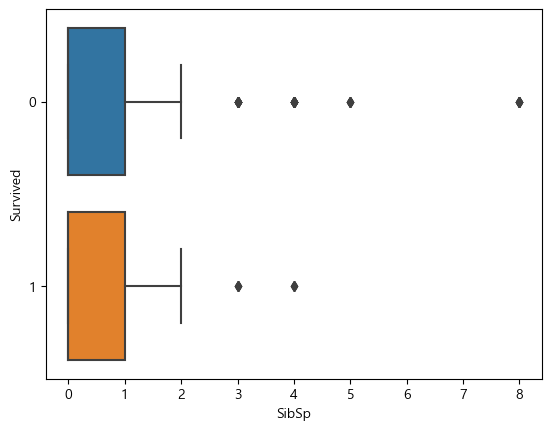

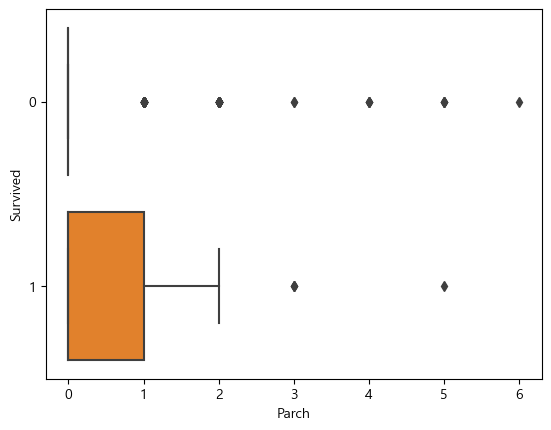

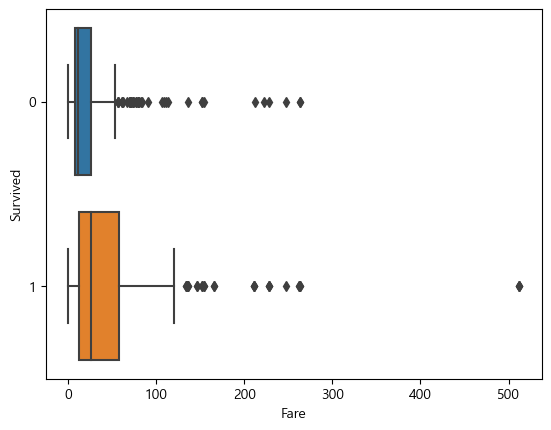

In [185]:
# x:연속형, y:범주형
for item in sur_list : 
    sns.boxplot(data=df_TFD_sur, x=item, y='Survived', orient='h')
    plt.show()

In [167]:
# x:범주형, y:범주형
df_TFD_sur_object_list = df_TFD_sur.describe(include=object).drop(columns=['Survived']).columns.to_list()
df_TFD_sur_object_list

['Pclass', 'Sex', 'Embarked']

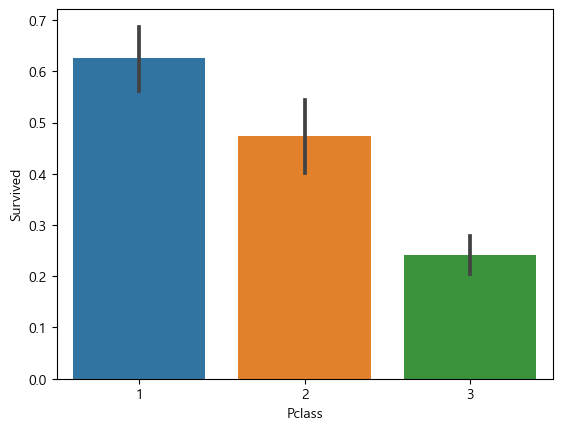

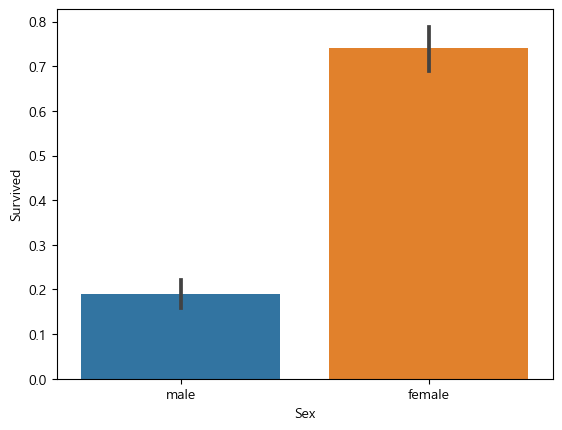

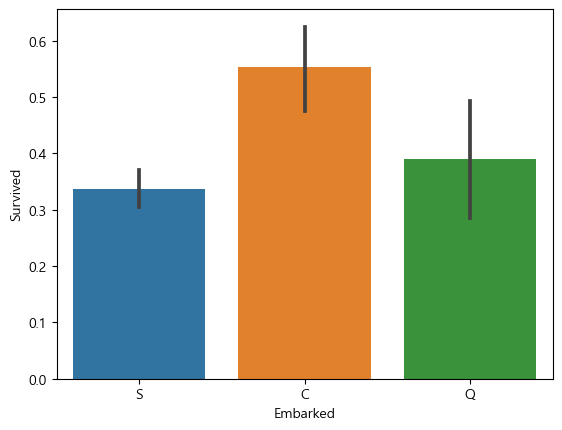

In [168]:
for item in df_TFD_sur_object_list :
    sns.barplot(data=df_TFD_sur, x=item, y='Survived')
    plt.show()